In [85]:
#import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [36]:
# Load the data
results = pd.read_csv('/Users/AbdurRahman/Downloads/results.csv')
races = pd.read_csv('/Users/AbdurRahman/Downloads/races.csv')
drivers = pd.read_csv('/Users/AbdurRahman/Downloads/drivers.csv')
constructors =pd.read_csv('/Users/AbdurRahman/Downloads/constructors.csv')


In [37]:
# Merge datasets
df = pd.merge(results, races [['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge (df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge (df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [38]:
#Checking after merging the datasets 
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [39]:
#Drop unnecessary columns 
df.drop(['number','position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace= True)

In [80]:
# Checking after dropping unnecessary columns 
df.head()

,year,gp_nam,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian


In [81]:
#Checking for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_nam                   25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   positionOrder            25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastestLapTime           6953 non-null   object 
 12  fastestLapSpeed          6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [43]:
# Dropped 10 unnecessary columns not needed for Analysis 
df.shape

(25460, 15)

In [79]:
# Rename columns 
df.rename(columns={'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality', 'name_y':'constructor_name', 'nationality_y':'constructor_nationality','driverRef':'driver'}, inplace = True)

In [78]:
df

,year,gp_nam,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25396,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25397,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25398,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [58]:
# Rearrange columns 
df = df[['year','gp_nam','round','driver','constructor_name','grid', 'positionOrder','points','time','milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed','driver_nationality', 'constructor_nationality']]

In [59]:
#drop season 2022 because it is incomplete 
df = df[df['year']!=2022]


In [67]:
# Sort Values 
df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [69]:
# Replace \N values in time col
df.time.replace('\\N', np.nan,inplace= True)
df.milliseconds.replace('\\N', np.nan,inplace= True)
df.fastest_lap_rank.replace('\\N', np.nan,inplace= True)
df.fastestLapTime.replace('\\N', np.nan,inplace= True)
df.fastestLapSpeed.replace('\\N', np.nan,inplace= True)

In [71]:
# Change datatypes
# we can not convert datatype into Int because there are missing values, so changing the datatype into float
df.milliseconds = df.milliseconds.astype(float)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float) 

In [72]:
# reset index
df.reset_index(drop= True, inplace = True)

In [74]:
# shape
df.shape


(25400, 15)

In [76]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_nam                   25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driver                   25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   positionOrder            25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastestLapTime           6953 non-null   object 
 12  fastestLapSpeed          6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [83]:
# Head
df.head(10)

,year,gp_nam,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
5,2021,Bahrain Grand Prix,1,leclerc,Ferrari,4,6,8.0,+59.090,5582987.0,11.0,1:34.988,205.112,Monegasque,Italian
6,2021,Bahrain Grand Prix,1,ricciardo,McLaren,6,7,6.0,+66.004,5589901.0,10.0,1:34.932,205.233,Australian,British
7,2021,Bahrain Grand Prix,1,sainz,Ferrari,8,8,4.0,+67.100,5590997.0,7.0,1:34.509,206.151,Spanish,Italian
8,2021,Bahrain Grand Prix,1,tsunoda,AlphaTauri,13,9,2.0,+85.692,5609589.0,8.0,1:34.761,205.603,Japanese,Italian
9,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British


In [115]:
# set figure size
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,8

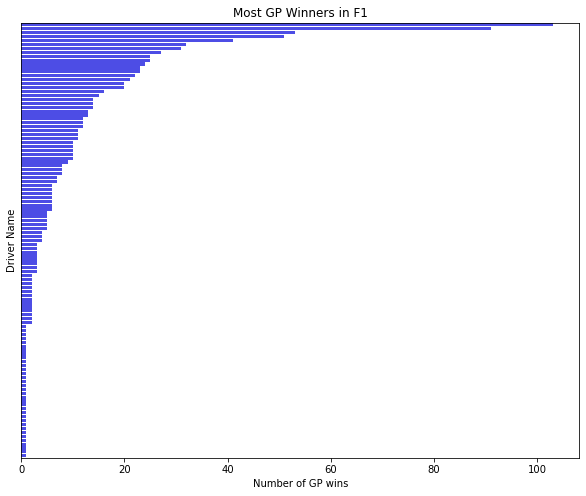

In [116]:
# GP winners
# I am trying to find out all drivers participated and won the GP

driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending= False).to_frame().reset_index()

# Barplot
sns.barplot(x = 'positionOrder' , y = 'driver',data= driver_winner, color = 'blue', alpha = 0.8)
plt.title('Most GP Winners in F1')
plt.xlabel('Number of GP wins')
plt.ylabel('Driver Name')
plt.yticks([])
plt.show()

Barplot shows that a large distribution of GP i.e. only a few drivers in the history of F1 won 20 GP in their career. There are some drivers who completely dominated the F1 racing and won over 50 GPs in their career. 

In [126]:
# Create new dataframe of top 10 GP winners 
top10Drivers = driver_winner.head(10)
top10Drivers

,driver,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,clark,25
9,lauda,25


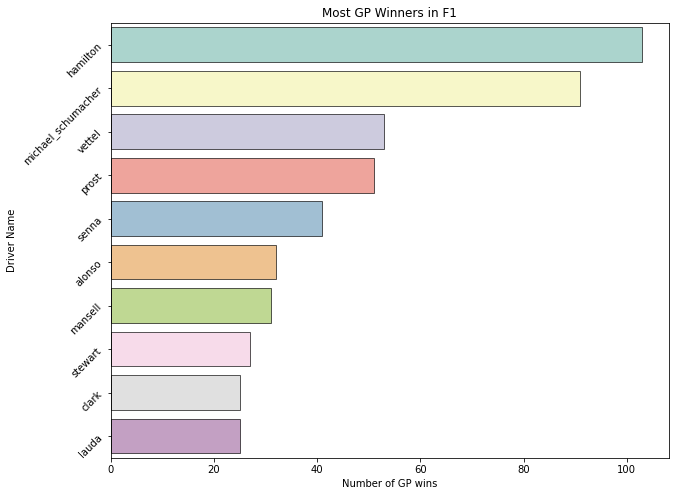

In [131]:
# Top 10 drivers plot
sns.barplot(x = 'positionOrder' , y = 'driver',data=top10Drivers, alpha = 0.8, linewidth = 0.8, edgecolor ='black')
plt.title('Most GP Winners in F1')
plt.xlabel('Number of GP wins')
plt.ylabel('Driver Name')
plt.yticks(rotation =45)
plt.show()

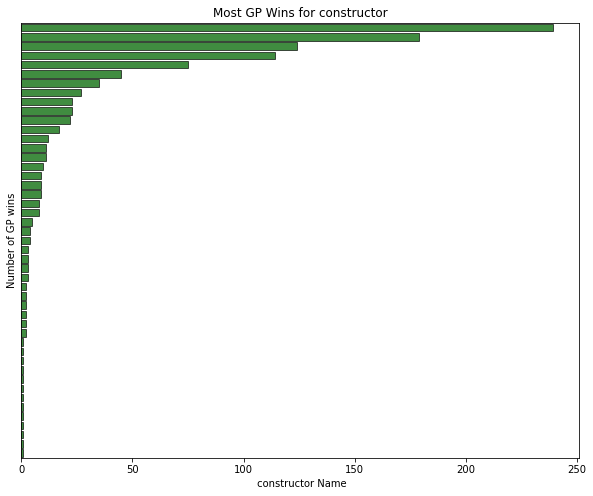

In [133]:
#GP constructor winners

constructor_winner = df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending= False).to_frame().reset_index()

# Barplot
sns.barplot(x = 'positionOrder' , y = 'constructor_name',data= constructor_winner, color = 'green', alpha = 0.8, linewidth = 0.8, edgecolor ='black')
plt.title('Most GP Wins for constructor')
plt.xlabel(' constructor Name')
plt.ylabel('Number of GP wins')
plt.yticks([])
plt.show()

In [134]:
#top 10 GP constructors winners
top10Constructors = constructor_winner.head(10)
top10Constructors

,constructor_name,positionOrder
0,Ferrari,239
1,McLaren,179
2,Mercedes,124
3,Williams,114
4,Red Bull,75
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


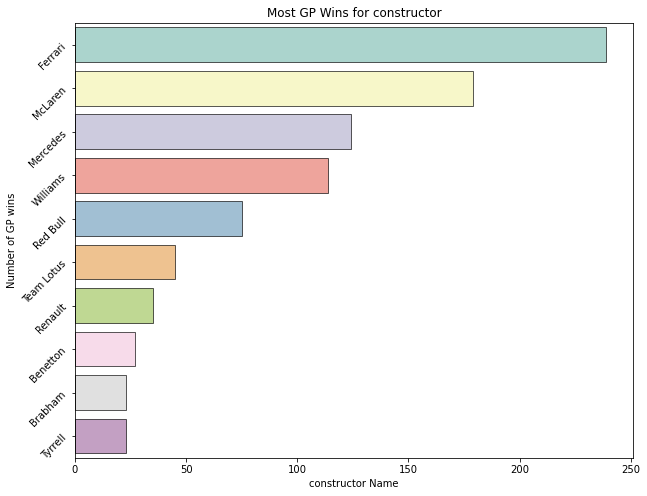

In [154]:
#Barplot of top 10 constructors
sns.barplot(x ='positionOrder' , y ='constructor_name',data= top10Constructors, alpha = 0.8, linewidth = 0.8, edgecolor ='black')
plt.title('Most GP Wins for constructor')
plt.xlabel('constructor Name')
plt.ylabel('Number of GP wins')
plt.yticks(rotation = 45)
plt.show()

Text(0.5, 0, 'Starting position')

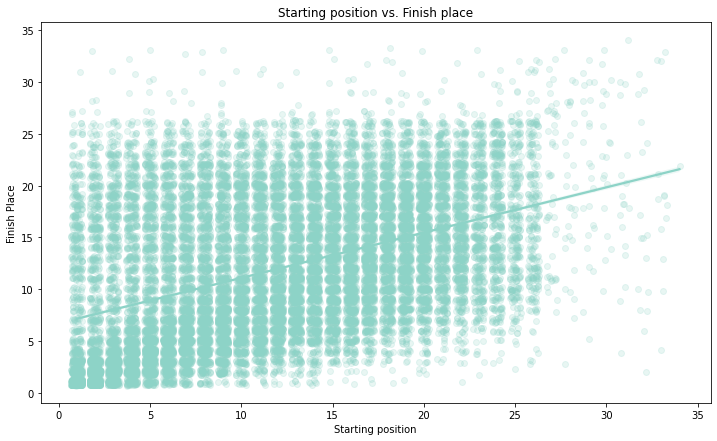

In [152]:
# Grid O means driver started from PIT LANE
df_no_zero = df[df['grid'] !=0]

# Create a plot
plt.figure(figsize = [12,7])
sns.regplot(x = 'grid', y = 'positionOrder', data = df_no_zero, x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha': 1/5});
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')

From Graph we can see there is a linear relationship between starting and finsihing postion. We can see most the races were 25 drivers and some races were over 30 drivers, represent by light dots.  

Text(0.5, 0.98, 'Average speed amonst all teams during the fastest lap at individual GPs')

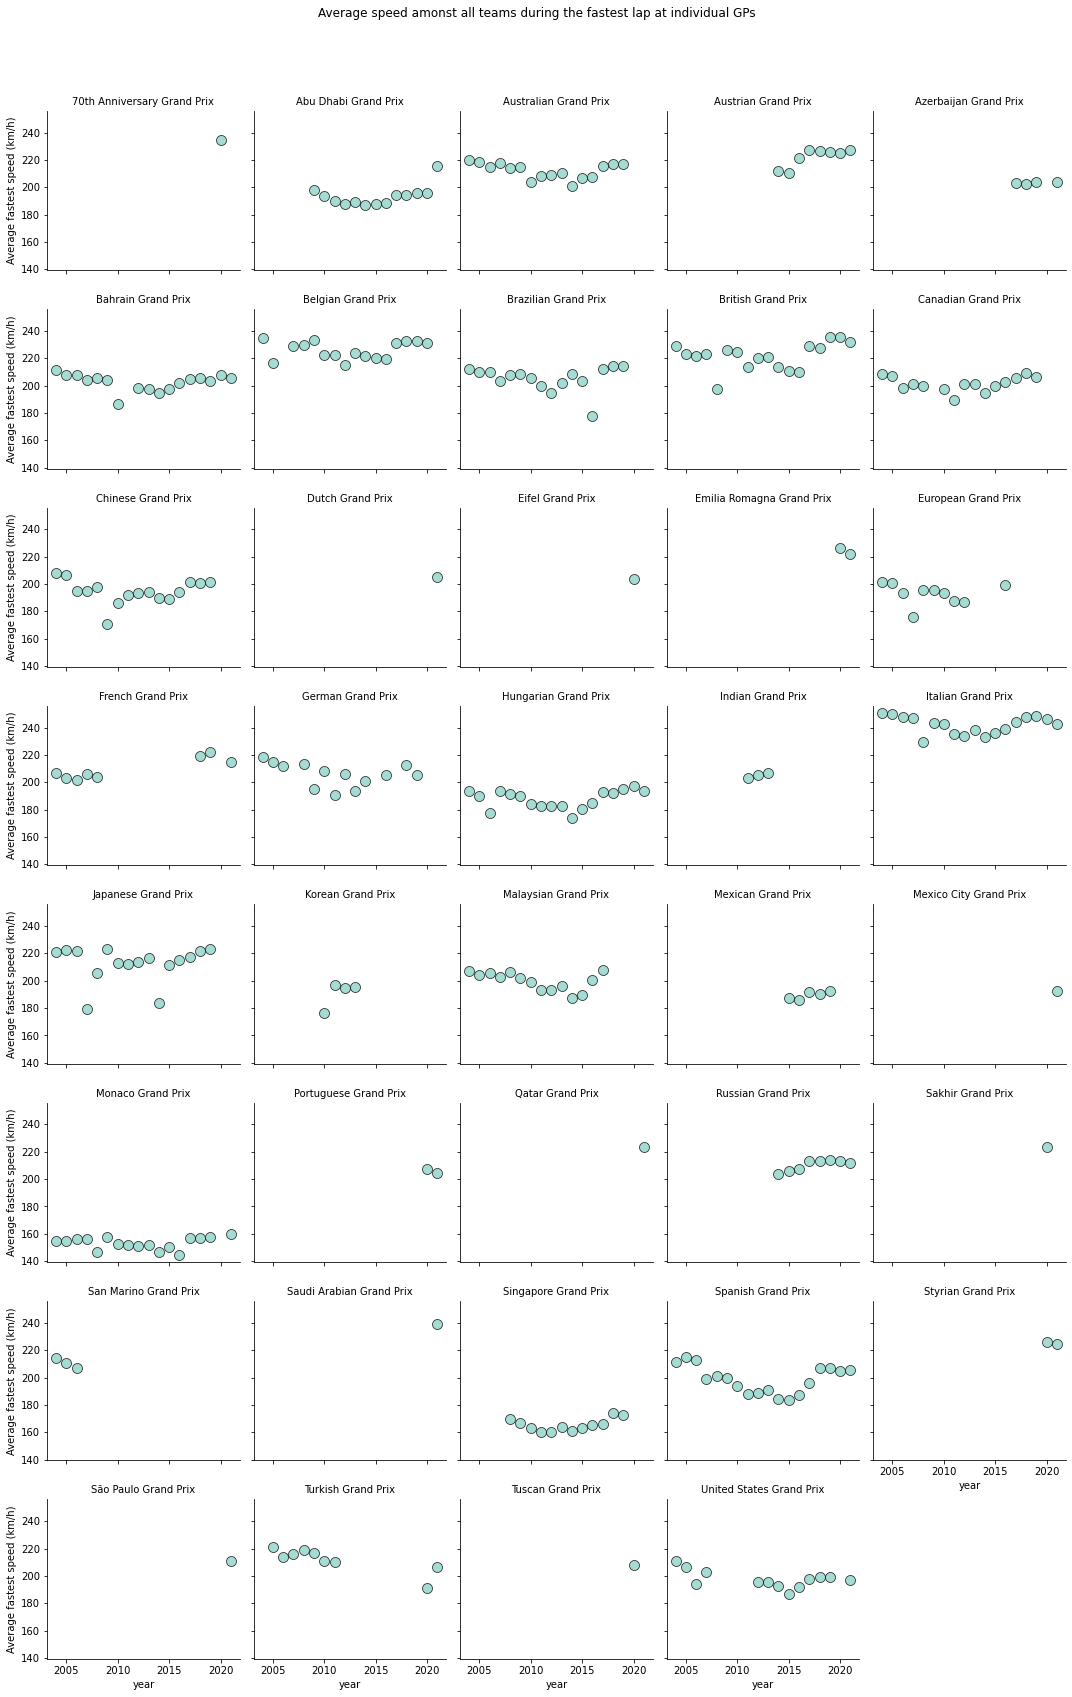

In [150]:
# Checking whether the speed of cars changed over the years
# I am taking from 2004 onwards since the data available from 2004.
df_speed = df[df['year']>= 2004]
df_group_speed = df_speed.groupby(['gp_nam', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# create a facetgrid
g =sns.FacetGrid(col ='gp_nam', col_wrap = 5, data =df_group_speed)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha =0.8, linewidth = 0.8, edgecolor ="black", s=100)
g.set_titles('{col_name}')
g.set_xlabels('year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top =0.92)
g.fig.suptitle('Average speed amonst all teams during the fastest lap at individual GPs')

We can see decrease in AVG speed of fastest lap from 2004 till 2015 for all the F1 circuits. The speed is different for each F1 track, for example, Italian Grand Prix has the fastest race in the calendar AVG speed exceeding over 240(km/h). On the other hand, Monaco Grand Prix is the slowest race with AVG speed below 160 (km/h) because Monaco Grand Prix has very narrow race track and also slowest corner in F1. However,From 2015 there is increase in AVG speed of fastest lap and the AVG speed varies for different GP events. 